# Predictive modeling for Titanic Dataset

## 1. Initial Review and Preprocessing

### 1.1 Reading the dataset

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
sns.set()

In [339]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### 1.2 Understanding the structure

In [340]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [341]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [342]:
train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [343]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [344]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [345]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.3 Identifying NaN and Null values

In [346]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [347]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 2. Data Visualization and Exploratory Data Analysis 

### 2.2 Bar charts

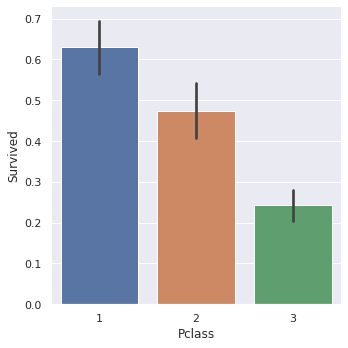

In [348]:
sns.catplot(x="Pclass", y="Survived", kind="bar", data=train)

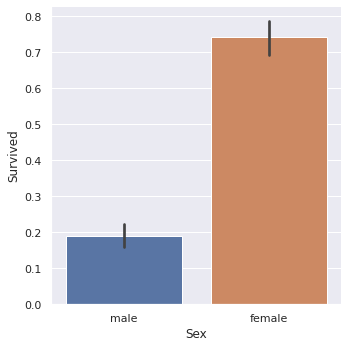

In [349]:
sns.catplot(x="Sex", y="Survived", kind="bar", data=train)

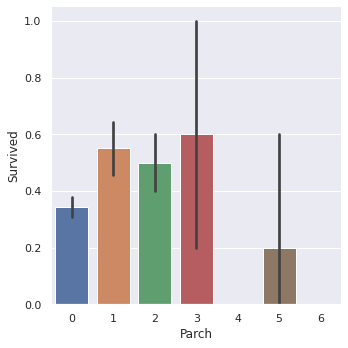

In [350]:
sns.catplot(x="Parch", y="Survived", kind="bar", data=train)

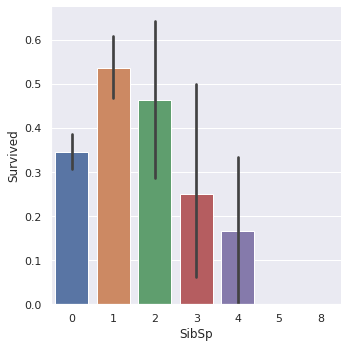

In [351]:
sns.catplot(x="SibSp", y="Survived", kind="bar", data=train)

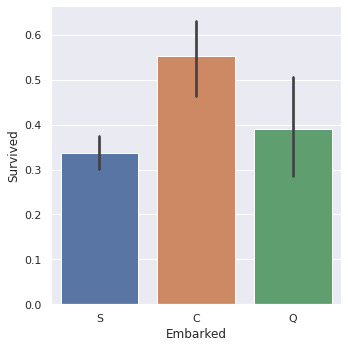

In [352]:
sns.catplot(x="Embarked", y="Survived", kind="bar", data=train)

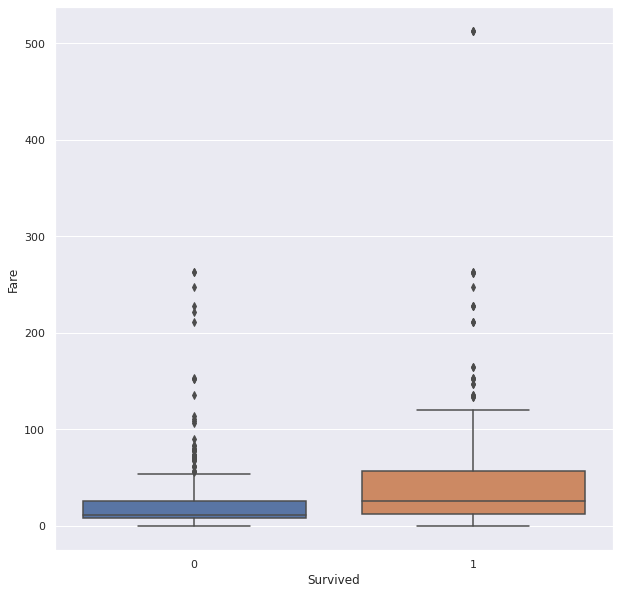

In [353]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "Survived", y = "Fare", data = train)

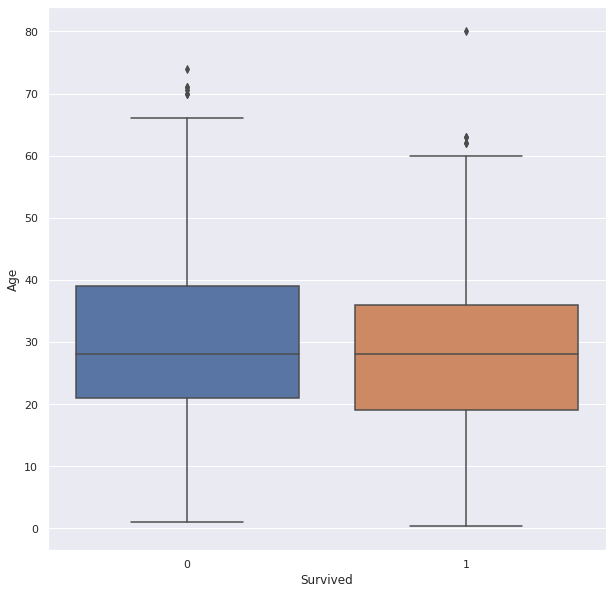

In [354]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "Survived", y = "Age", data = train)

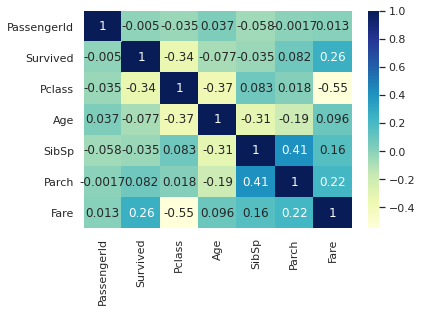

In [355]:
train.corr()
sns.heatmap(train.corr(), cmap = "YlGnBu", cbar = True, annot = True)

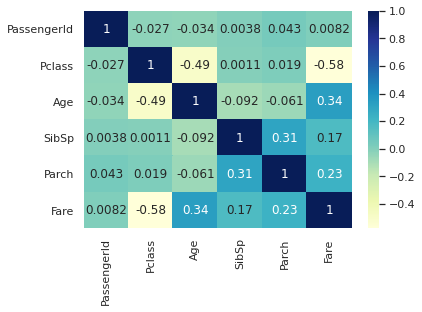

In [356]:
test.corr()
sns.heatmap(test.corr(), cmap = "YlGnBu", cbar = True, annot = True)

## 3. Feature Extraction and Feature Engineering

#### Here we manipulate the data and try to get the meaning about of it. As can be see in above plots. We replace the NaN values in the columns "Age" and "Embarked" with median and "S" values respectively. We drop the low signifcant columns like PassengerId, Ticket, Cabin from table to make it cleaner.

### 3.1 Modeling the data

In [357]:
# Fill in the missing values
train["Age"].fillna(train["Age"].median(), inplace = True)
train["Embarked"].fillna("S" , inplace = True)

In [358]:
# Convert "Sex" to the binary values, 0 for male and 1 for female.
train['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
train['Pclass'].replace(to_replace=[1,2,3], value=["First","Second","Third"],inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Third,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,Third,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [359]:
train.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex  Survived
0    0           0.811092
     1           0.188908
1    1           0.742038
     0           0.257962
Name: Survived, dtype: float64

In [360]:
train[['PassengerId','Pclass','Sex','Age','SibSp','Fare','Parch','Embarked']].head()

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Parch,Embarked
0,1,Third,0,22.0,1,7.2500,0,S
1,2,First,1,38.0,1,71.2833,0,C
2,3,Third,1,26.0,0,7.9250,0,S
3,4,First,1,35.0,1,53.1000,0,S
4,5,Third,0,35.0,0,8.0500,0,S


In [361]:
train.groupby(['Embarked'])['Survived'].value_counts(normalize=True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

In [362]:
train.groupby(['Pclass'])['Survived'].value_counts(normalize=True)

Pclass  Survived
First   1           0.629630
        0           0.370370
Second  0           0.527174
        1           0.472826
Third   0           0.757637
        1           0.242363
Name: Survived, dtype: float64

### 3.1 One Hot Encoding

In [363]:
Feature = train[['PassengerId','Pclass','Sex','Age','SibSp','Fare','Parch','Embarked']]
Feature = pd.concat([Feature,pd.get_dummies(train['Embarked'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(train['Pclass'])], axis=1)
Feature.drop(['Pclass','Parch','Embarked'], axis = 1,inplace=True)
Feature.head()

,PassengerId,Sex,Age,SibSp,Fare,C,Q,S,First,Second,Third
0,1,0,22.0,1,7.2500,0,0,1,0,0,1
1,2,1,38.0,1,71.2833,1,0,0,1,0,0
2,3,1,26.0,0,7.9250,0,0,1,0,0,1
3,4,1,35.0,1,53.1000,0,0,1,1,0,0
4,5,0,35.0,0,8.0500,0,0,1,0,0,1


In [364]:
X = Feature
X[0:5]

,PassengerId,Sex,Age,SibSp,Fare,C,Q,S,First,Second,Third
0,1,0,22.0,1,7.2500,0,0,1,0,0,1
1,2,1,38.0,1,71.2833,1,0,0,1,0,0
2,3,1,26.0,0,7.9250,0,0,1,0,0,1
3,4,1,35.0,1,53.1000,0,0,1,1,0,0
4,5,0,35.0,0,8.0500,0,0,1,0,0,1


In [365]:
y = train["Survived"]
y[0:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [366]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.73010796, -0.73769513, -0.56573646,  0.43279337, -0.50244517,
        -0.48204268, -0.30756234,  0.61583843, -0.56568542, -0.51015154,
         0.90258736],
       [-1.72622007,  1.35557354,  0.66386103,  0.43279337,  0.78684529,
         2.0745051 , -0.30756234, -1.62380254,  1.76776695, -0.51015154,
        -1.10792599],
       [-1.72233219,  1.35557354, -0.25833709, -0.4745452 , -0.48885426,
        -0.48204268, -0.30756234,  0.61583843, -0.56568542, -0.51015154,
         0.90258736],
       [-1.71844431,  1.35557354,  0.4333115 ,  0.43279337,  0.42073024,
        -0.48204268, -0.30756234,  0.61583843,  1.76776695, -0.51015154,
        -1.10792599],
       [-1.71455642, -0.73769513,  0.4333115 , -0.4745452 , -0.48633742,
        -0.48204268, -0.30756234,  0.61583843, -0.56568542, -0.51015154,
         0.90258736]])

## 4. KNN Machine Learning Model

In [367]:
from sklearn.model_selection import train_test_split
X_train,X_CV,y_train,y_CV = train_test_split(X,y, test_size = 0.2, random_state=4)
print('Train set : ',X_train.shape,y_train.shape)
print('CV set : ',X_CV.shape,y_CV.shape )

Train set :  (712, 11) (712,)
CV set :  (179, 11) (179,)


In [368]:
from sklearn.neighbors import KNeighborsClassifier
k=9
knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn_model

KNeighborsClassifier(n_neighbors=9)

In [369]:
yhat = knn_model.predict(X_CV)
yhat[0:5]

array([0, 0, 1, 1, 0])

### 4.1 Train and Cross Validation set accuracy

In [370]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("CV set Accuracy: ", metrics.accuracy_score(y_CV, yhat))

Train set Accuracy:  0.8300561797752809
CV set Accuracy:  0.8435754189944135


## 5. Test Set Evaluation

In [371]:
# Fill in the missing values
test["Age"].fillna(test["Age"].median(), inplace = True)
test["Fare"].fillna(test["Fare"].median(), inplace = True)

In [372]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [373]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [374]:
test['Pclass'].replace(to_replace=[1,2,3], value=["First","Second","Third"],inplace=True)
test['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [375]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,Third,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,Third,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,Second,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,Third,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,Third,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [376]:
test_Feature = test[['PassengerId','Pclass','Sex','Age','SibSp','Fare','Parch','Embarked']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test['Embarked'])], axis=1)
test_Feature = pd.concat([test_Feature,pd.get_dummies(test['Pclass'])], axis=1)
test_Feature.drop(['Pclass','Parch','Embarked'], axis = 1,inplace=True)
test_Feature.head()

,PassengerId,Sex,Age,SibSp,Fare,C,Q,S,First,Second,Third
0,892,0,34.5,0,7.8292,0,1,0,0,0,1
1,893,1,47.0,1,7.0000,0,0,1,0,0,1
2,894,0,62.0,0,9.6875,0,1,0,0,1,0
3,895,0,27.0,0,8.6625,0,0,1,0,0,1
4,896,1,22.0,1,12.2875,0,0,1,0,0,1


In [377]:
X_test = test_Feature
X_test[0:5]

,PassengerId,Sex,Age,SibSp,Fare,C,Q,S,First,Second,Third
0,892,0,34.5,0,7.8292,0,1,0,0,0,1
1,893,1,47.0,1,7.0000,0,0,1,0,0,1
2,894,0,62.0,0,9.6875,0,1,0,0,1,0
3,895,0,27.0,0,8.6625,0,0,1,0,0,1
4,896,1,22.0,1,12.2875,0,0,1,0,0,1


In [378]:
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[-1.72791209, -0.75592895,  0.38623105, -0.49947002, -0.49741333,
        -0.56814154,  2.84375747, -1.35067551, -0.58655899, -0.5349335 ,
         0.95782629],
       [-1.71962474,  1.32287566,  1.37137004,  0.61699237, -0.51227801,
        -0.56814154, -0.35164743,  0.74037028, -0.58655899, -0.5349335 ,
         0.95782629],
       [-1.71133739, -0.75592895,  2.55353683, -0.49947002, -0.46410047,
        -0.56814154,  2.84375747, -1.35067551, -0.58655899,  1.86939125,
        -1.04403065],
       [-1.70305005, -0.75592895, -0.20485235, -0.49947002, -0.48247516,
        -0.56814154, -0.35164743,  0.74037028, -0.58655899, -0.5349335 ,
         0.95782629],
       [-1.6947627 ,  1.32287566, -0.59890794,  0.61699237, -0.4174915 ,
        -0.56814154, -0.35164743,  0.74037028, -0.58655899, -0.5349335 ,
         0.95782629]])

### 5.1 Model Prediction

In [379]:
prediction = pd.DataFrame()
prediction['PassengerId'] = test['PassengerId']
prediction['Survived'] = knn_model.predict(X_test)
prediction['Survived'] = sub['Survived'].apply(lambda x: 1 if x>0.94 else 0)
prediction.to_csv('gender_submission.csv', index=False)

prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
